In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Time Series/gold_data.csv")

In [32]:
df

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
...,...,...
5649,05-05-2024,7068
5650,04-05-2024,7068
5651,03-05-2024,7039
5652,02-05-2024,7069


In [33]:
df.isnull().sum()

Date          0
Gold Price    0
dtype: int64

In [34]:
df.dtypes

Date          object
Gold Price     int64
dtype: object

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-35-b9c6864122be>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [36]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = df['Date'].dt.month

In [37]:
df.rename(columns={'Gold Price': 'Gold_Price'}, inplace=True)

In [38]:
df

,Date,Gold_Price,Year,Month
0,2008-08-31,1190,2008,8
1,2008-08-30,1188,2008,8
2,2008-08-29,1186,2008,8
3,2008-09-30,1350,2008,9
4,2008-09-29,1317,2008,9
...,...,...,...,...
5649,2024-05-05,7068,2024,5
5650,2024-05-04,7068,2024,5
5651,2024-05-03,7039,2024,5
5652,2024-05-02,7069,2024,5


In [39]:
df.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int64
Month                  int32
dtype: object

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

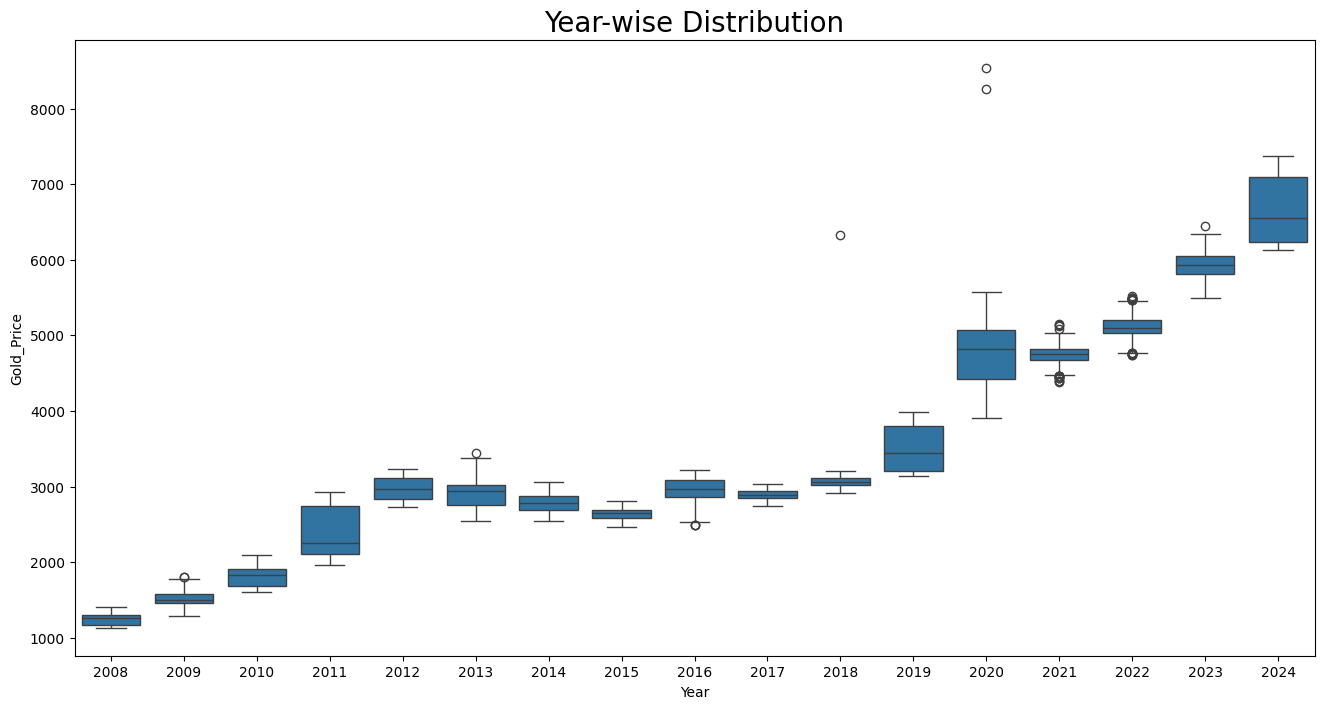

In [41]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Year',y='Gold_Price',data = df)
plt.title('Year-wise Distribution',size = 20)
plt.show()

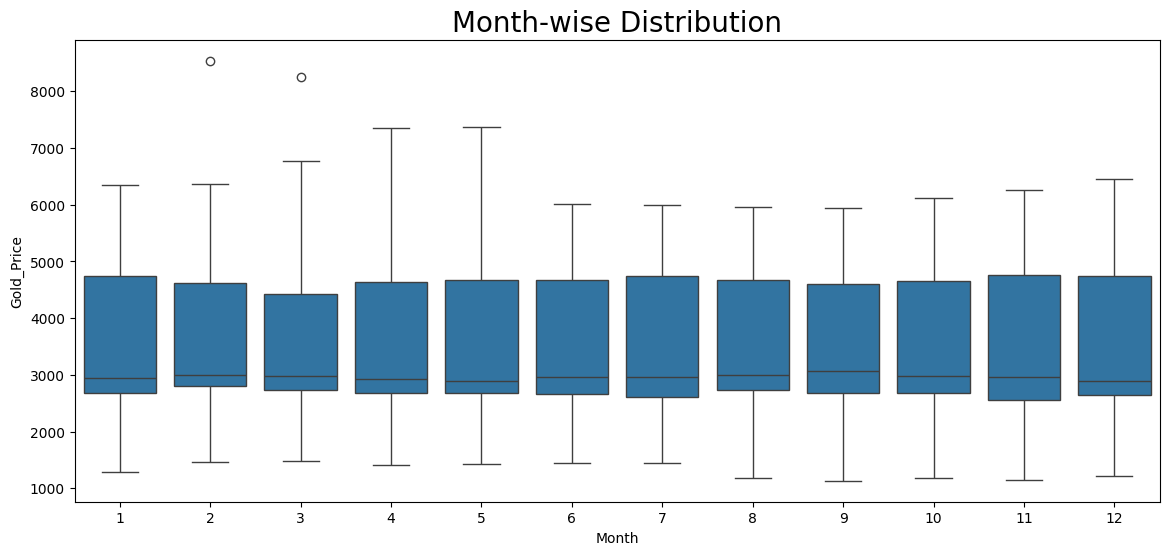

In [42]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month',y='Gold_Price',data = df)
plt.title('Month-wise Distribution',size = 20)
plt.show()

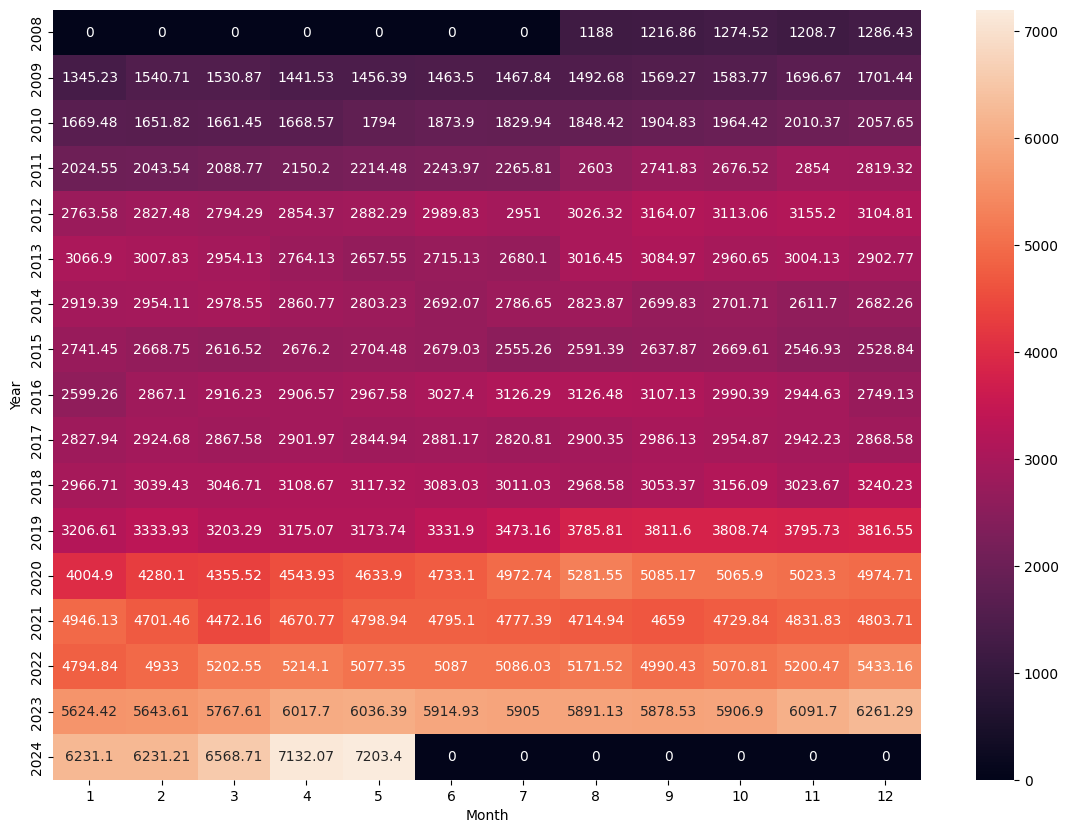

In [43]:
year_month_df = pd.pivot_table(data = df,values='Gold_Price',index='Year', columns='Month').fillna(0)
plt.figure(figsize=(14,10))
sns.heatmap(year_month_df,annot = True,fmt='g',)
plt.show()

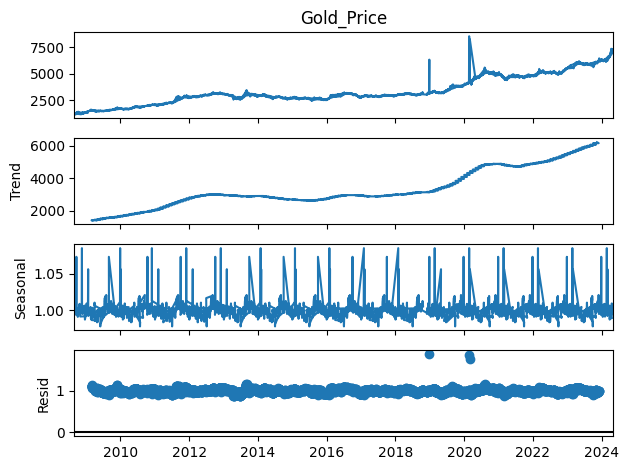

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df.set_index('Date')['Gold_Price'], model='multiplicative', period=365)

# Plot the decomposition
decomposition.plot()
plt.show()


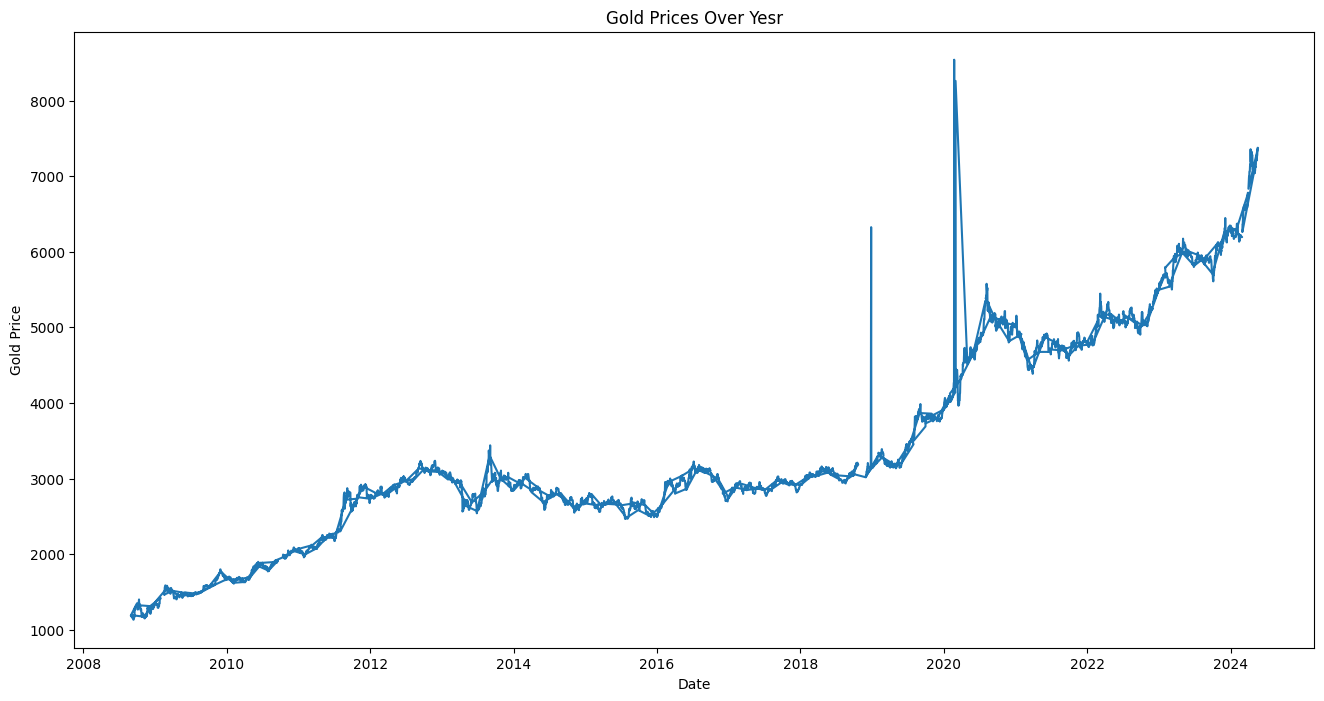

In [45]:
# Plot gold prices over time
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Gold_Price'])
plt.title('Gold Prices Over Yesr')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()


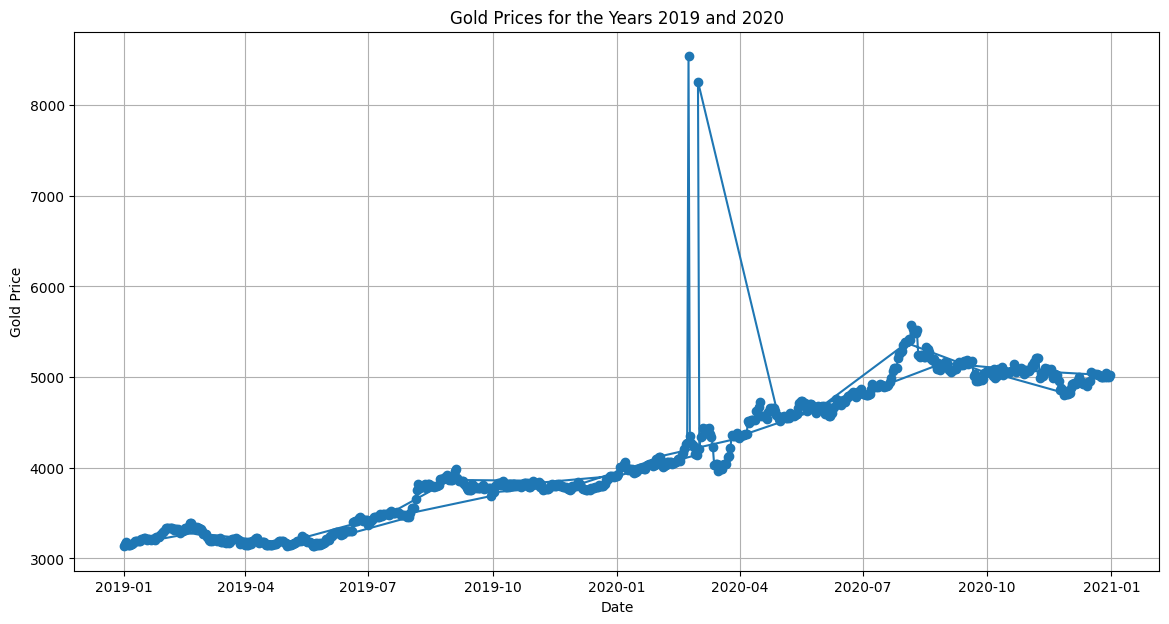

In [46]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


df_filtered = df[(df['Date'].dt.year == 2019) | (df['Date'].dt.year == 2020)]

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Gold_Price'], marker='o', linestyle='-')
plt.title('Gold Prices for the Years 2019 and 2020')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid(True)
plt.show()


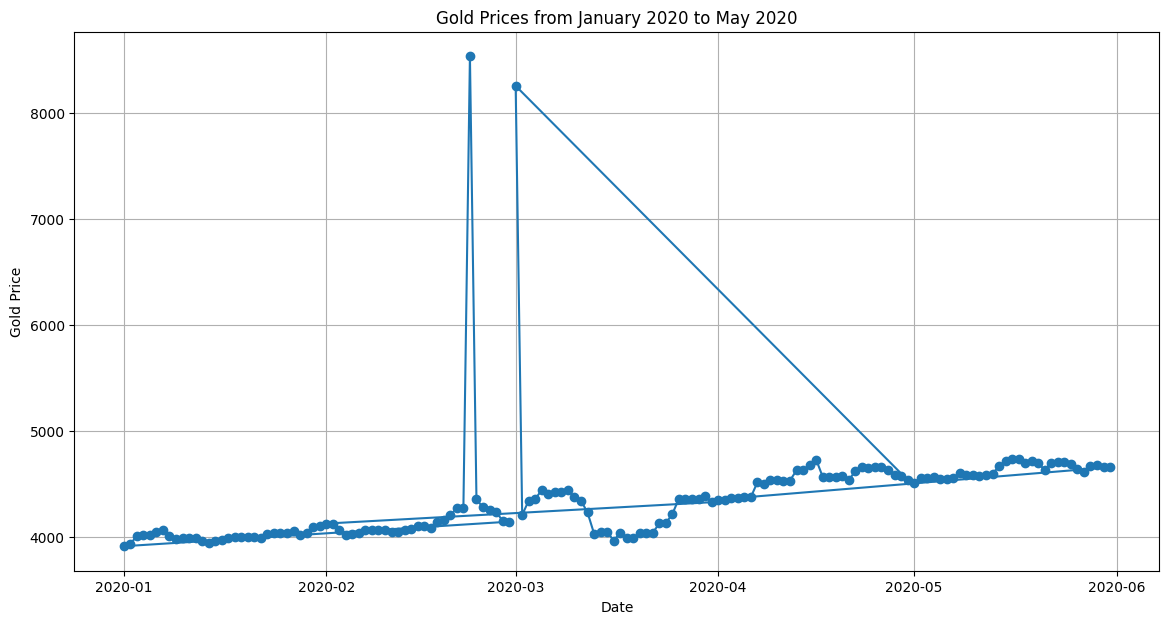

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for the date range between January 2020 and May 2020
start_date = '2020-01-01'
end_date = '2020-05-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Gold_Price'], marker='o', linestyle='-')
plt.title('Gold Prices from January 2020 to May 2020')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid(True)
plt.show()


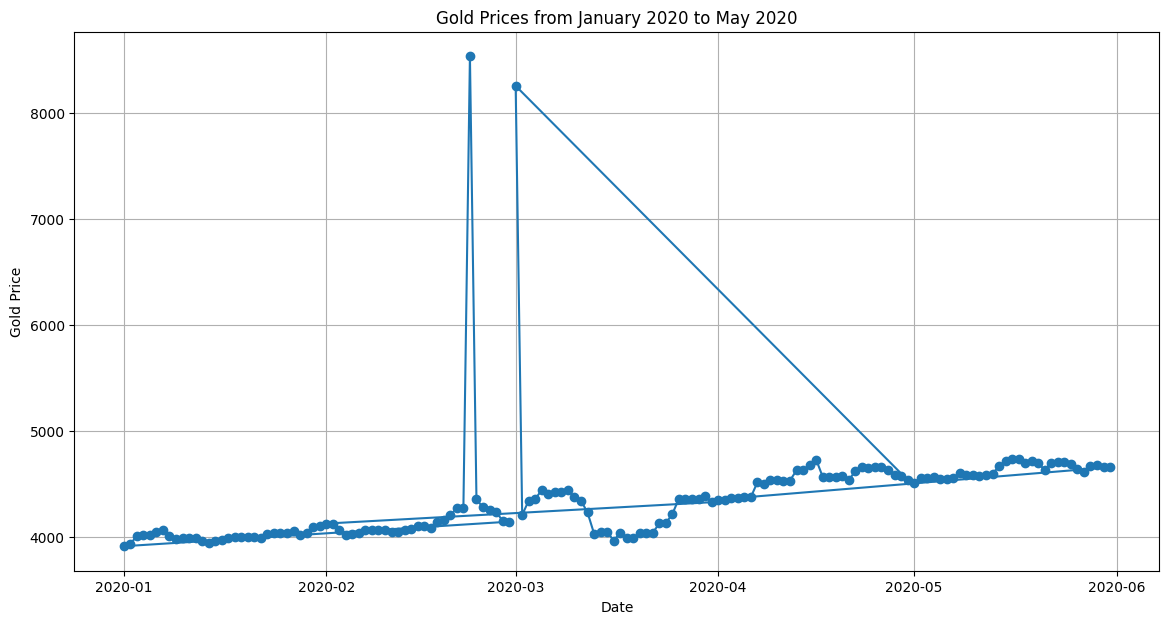

The highest gold price between January 2020 and May 2020 was 8540 on 2020-02-23.


In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for the date range between January 2020 and May 2020
start_date = '2020-01-01'
end_date = '2020-05-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Date'], df_filtered['Gold_Price'], marker='o', linestyle='-')
plt.title('Gold Prices from January 2020 to May 2020')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid(True)
plt.show()

# Find the highest price and corresponding date
max_price = df_filtered['Gold_Price'].max()
max_price_date = df_filtered[df_filtered['Gold_Price'] == max_price]['Date'].iloc[0]

print(f"The highest gold price between January 2020 and May 2020 was {max_price} on {max_price_date.strftime('%Y-%m-%d')}.")


In [49]:
correlation_matrix = df.corr()
print(correlation_matrix)

                Date  Gold_Price      Year     Month
Date        1.000000    0.916631  0.997968 -0.031096
Gold_Price  0.916631    1.000000  0.914985 -0.032044
Year        0.997968    0.914985  1.000000 -0.094500
Month      -0.031096   -0.032044 -0.094500  1.000000


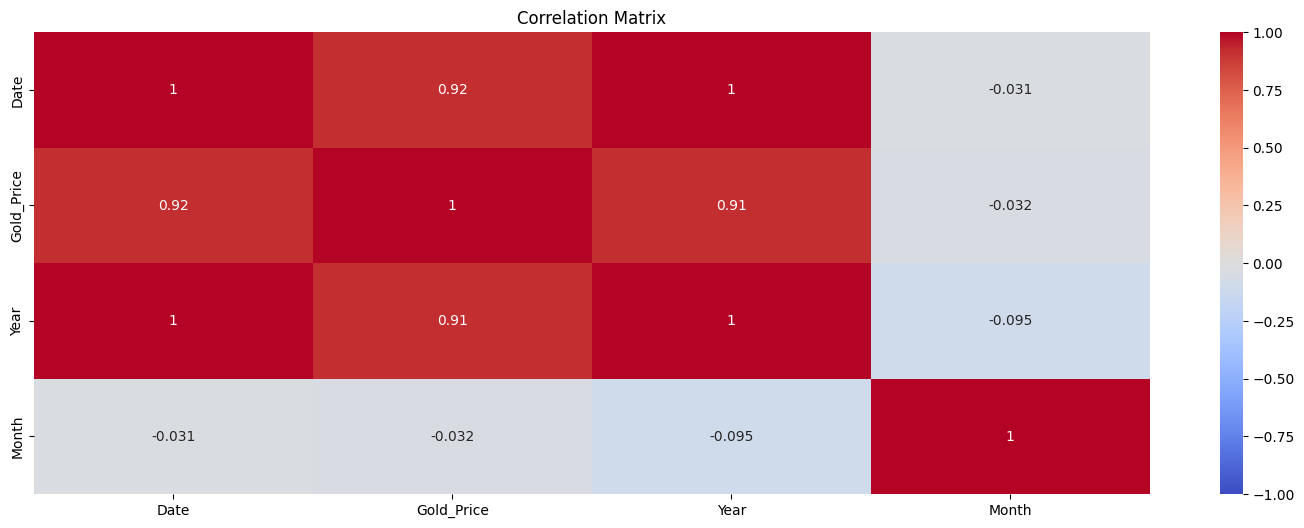

In [50]:
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

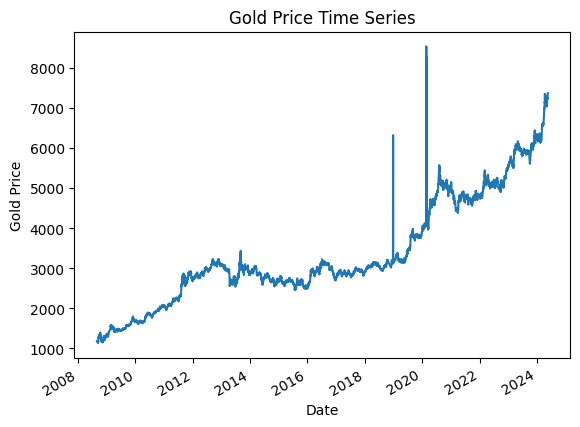

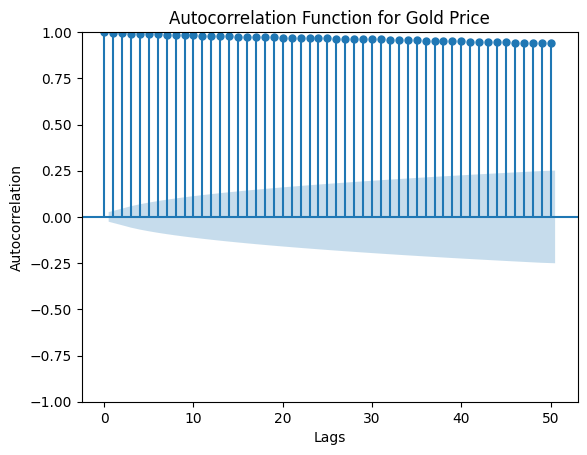

ADF Statistic: 1.6539536968990984
p-value: 0.998010744086906
Critical Values: {'1%': -3.431514108424855, '5%': -2.86205442253532, '10%': -2.5670438255911145}
The time series is non-stationary.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the time series
df['Gold_Price'].plot()
plt.title('Gold Price Time Series')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

# Plot Autocorrelation Function (ACF)
plot_acf(df['Gold_Price'], lags=50)
plt.title('Autocorrelation Function for Gold Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Augmented Dickey-Fuller Test to check for stationarity
adf_result = adfuller(df['Gold_Price'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

# Interpret the ADF test result
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


In [22]:
df.shape

(5654, 5)

In [23]:
train_data = df.head(4454)
test_data  = df.tail(1200)

In [24]:
train_data

,Date,Gold_Price,Year,Month,Moving_Avg
0,2008-08-31,1190,2008,8,NaN
1,2008-08-30,1188,2008,8,NaN
2,2008-08-29,1186,2008,8,NaN
3,2008-09-30,1350,2008,9,NaN
4,2008-09-29,1317,2008,9,NaN
...,...,...,...,...,...
4449,2021-02-28,4577,2021,2,4936.233333
4450,2021-02-27,4575,2021,2,4925.100000
4451,2021-02-26,4619,2021,2,4915.233333
4452,2021-02-25,4638,2021,2,4907.766667


In [25]:
test_data

,Date,Gold_Price,Year,Month,Moving_Avg
4454,2021-02-23,4660,2021,2,4889.900000
4455,2021-02-22,4680,2021,2,4882.100000
4456,2021-02-21,4620,2021,2,4872.300000
4457,2021-02-20,4620,2021,2,4863.100000
4458,2021-02-19,4647,2021,2,4853.200000
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,7160.200000
5650,2024-05-04,7068,2024,5,7156.066667
5651,2024-05-03,7039,2024,5,7150.966667
5652,2024-05-02,7069,2024,5,7141.400000
